<a href="https://colab.research.google.com/github/Archertakesitez/vis_hw2/blob/main/VisML_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **White/Glass Box Model Understanding**

In this assignment, you will be creating visualizations that will help you explore the behavior of white (or glass) box models.

## **Task 1 - Linear Regression Plot** (40%)

During the lab session this week, we used a boxplot and a histogram to explore the scikit learn [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Now, we want you to use D3.js and notebookJS to create a linear regression plot showing the correlation between the actual and the predicted value for data.target (a quantitative measure of disease progression one year after baseline) for each sample in the dataset. You should also include the line of best fit. An example regression plot for a different dataset is shown below:

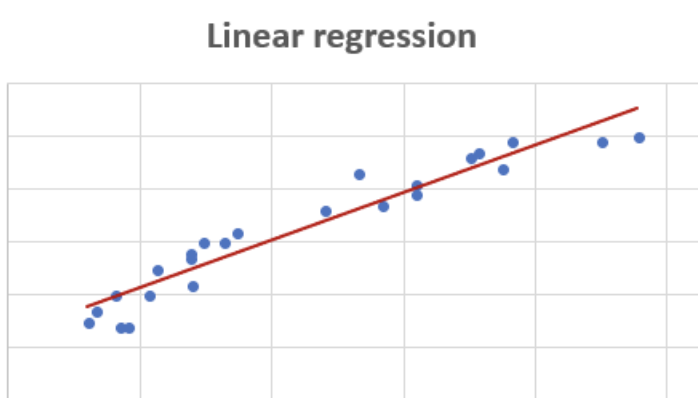

First, we import relevant libraries, load our external files (provided on Brightspace), and define our python callback for notebookJS:

In [358]:
from sklearn import linear_model
import pandas as pd
from sklearn import datasets
!pip install notebookjs
from notebookjs import execute_js

In [429]:
code_js  = open("/content/visML_HW2.js", "r").read()
code_css = open("vis01.css", "r").read() #This file can be found here: https://drive.google.com/file/d/1ysyZYHo6LqF8ryEEB8z15YeNFL8LGrPM/view?usp=sharing
d3_path = "https://d3js.org/d3.v7.min.js"

In [430]:
import random

def python_callback( data ):

  global b
  b = data

  return {'n': random.random(), 'y': 'VisML' }

Next, we load the scikit-learn diabetes dataset:

In [439]:
data = datasets.load_diabetes()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


Next, you should use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) train a linear regression model to predict disease progression after one year (data.target) using the 10 given features for each sample: (10%)

In [441]:
#TO DO
'''train the linear regression model'''
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(X, y)
y_pred = reg.predict(X)
data = [{"x":y[i],"y":y_pred[i]} for i in range(0,len(y))]

In [442]:
#also obtain the line of best fit
reg_line = linear_model.LinearRegression()
y_reshape = y.reshape(-1,1)
reg_line.fit(y_reshape,y_pred)

LinearRegression()

In [443]:
reg_line.coef_#obtain coeficient and intercept for the line of best fit, then calculate the line by hand in .js file

array([0.51774842])

In [444]:
reg_line.intercept_

73.36661277067199

Finally, draw your regression plot using the notebookJS "execute_js" function (write your main function in the external js file): (30%)

In [445]:
execute_js(library_list=[d3_path, code_js],
           main_function="draw_regression",
           css_list=[code_css],
           data_dict={"data":data})

## **Task 2 - Partial Dependence Plots (PDPs)** (30%)

For this task, we introduce a multiclass classification problem that will be familiar to you from a previous lab: classifying iris flowers by subspecies using their sepal width, sepal length, petal width, and petal length.

We first load the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris):

In [514]:
data_iris = datasets.load_iris()

X_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
y_iris = data_iris.target
X_iris[0:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [515]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **2.1 - Training the Classifier** (10%)

Use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to train a Gradient Boosting Classifier that predicts iris subspecies using the four given features.

In [516]:
#TO DO
from sklearn.ensemble import GradientBoostingClassifier

In [531]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_iris, y_iris)

### **2.2 - One-Way PDPs** (10%)

Create a one-way partial dependence plot for each of the four features in the dataset, showing how each affects the classification outcome. Interpret these plots - do all features impact the determination of the classification label?

You may use scikit-learn's PartialDependenceDisplay function.

In [530]:
#TO DO
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt

In [528]:
feature_names = data_iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Now we create plots for each of the 4 features for each of the 3 classes.

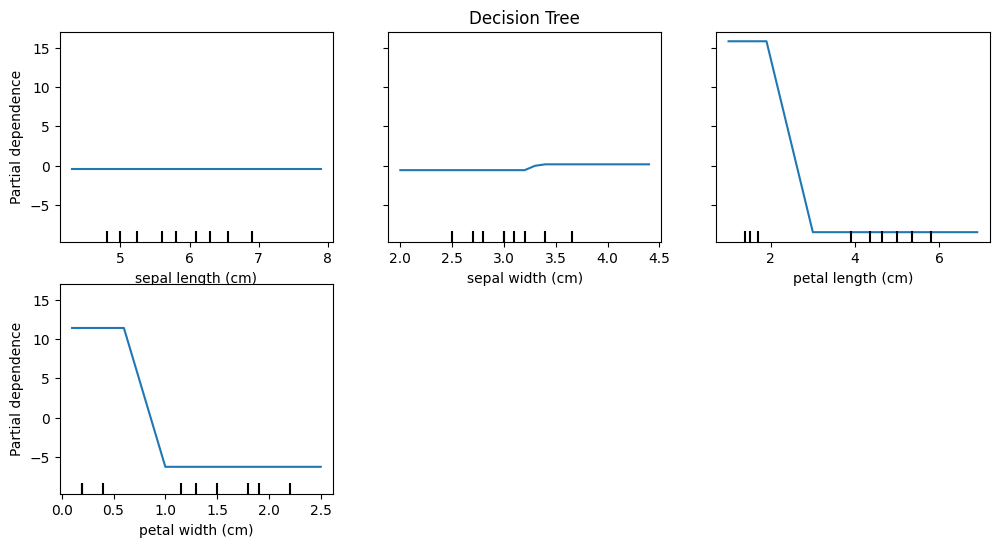

In [550]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(clf, X_iris,[0,1,2,3], ax=ax,target=0)

From the plots above, we can tell that sepal length and sepal width have very little impact on class[0], while petal length and petal width have heavy impact on class[0]. When Petal length(cm) goes from 2 to 3, the probability that the Iris is from class[0] drops; when petal width(cm) goes from 0.5 to 1.0, the probability that Iris is from class[0] drops as well.

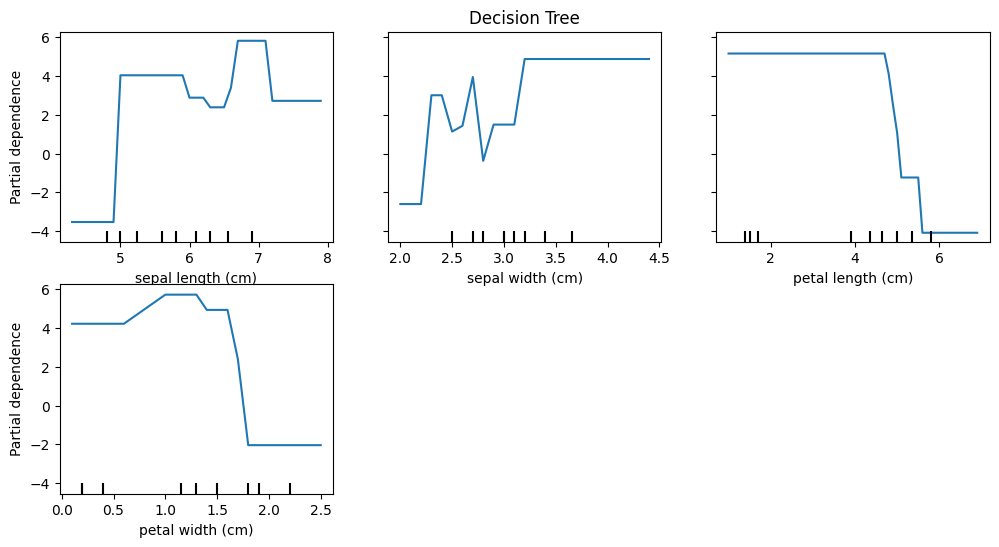

In [551]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(clf, X_iris,[feature_names[0], feature_names[1],feature_names[2],feature_names[3]], ax=ax,target=1)

From the plots above, we can observe that all of these four features have significant influence over class[1].When Setap length(cm) goes from 5 to 6 and when sepal width(cm) goes from 2 to 3, the probability that Iris is from class[1] rises; when petal length(cm) goes from 4 to 6 and petal width(cm) goes from 1.5 to 2.0, the probability that Iris is from class[1] drops.

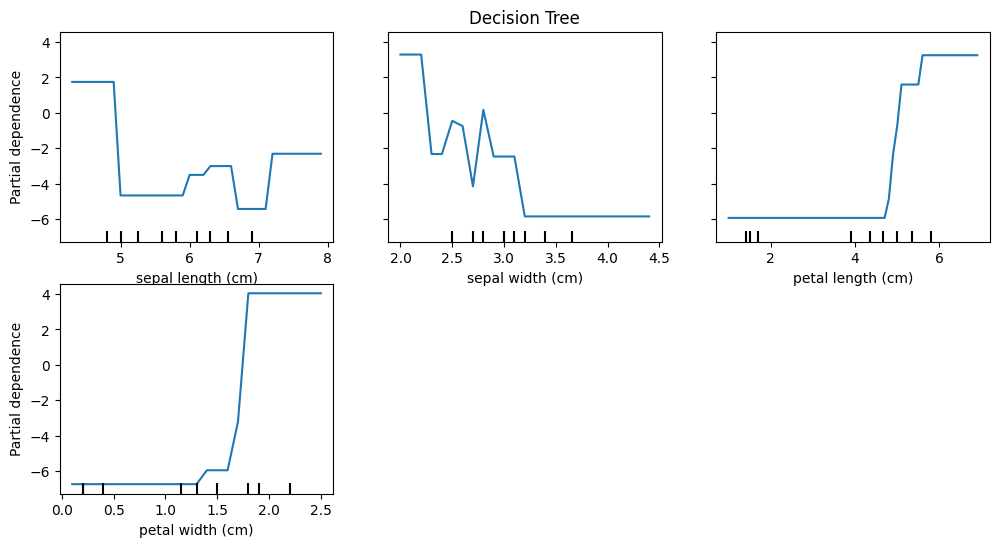

In [538]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(clf, X_iris,[feature_names[0], feature_names[1],feature_names[2],feature_names[3]], ax=ax,target=2)

From the plots above, we can observe that all of the four features have significant impact on class[2].When Sepal length(cm) goes from 4.5 to 5.0 and when Sepal width(cm) goes from 2.0 to 3.5, the probability that Iris is from class[2] drops; when petal length(cm) goes from 5 to 6 and when petal width(cm) goes from 1.0 to 2.0, the probability that Iris is from class[2] rises.

### **2.3 - Two-Way PDPs** (10%)

Choose 2 features from the iris dataset. Make a two-way partial dependence plot for these features. Interpret this plot.

### I choose sepal length and sepal width as my two features.

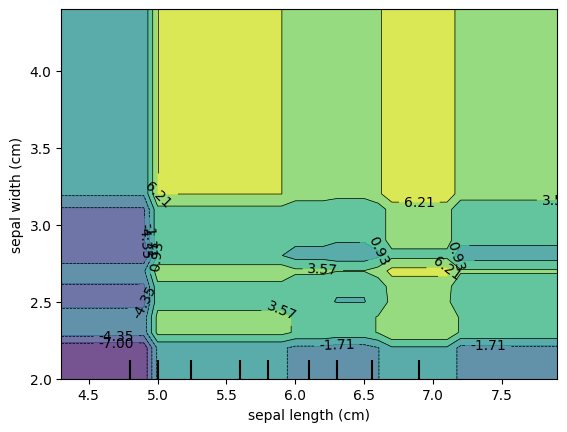

In [555]:
two_way = PartialDependenceDisplay.from_estimator(clf, X_iris,
                                              [(0,1)],target=1)

I have chosen sepal length(cm) and sepal width(cm) as the two features. I have chosen class[1] as the target class to make this two-way PDP.

From the two-way PDP graph above, we can tell that when sepal length(cm) is smaller than 5.0 and sepal width(cm) is smaller than 3.0, the probability of Iris being from class[1] is very little; when sepal length(cm) is from 5.0 to 6.0 or from 6.5 to slightly over 7.0, and when sepal width is greater than 3.0, the probability of Iris being from class[1] is much higher.

## **Questions** (30%)

1) What is the difference between white and black box models (consider accuracy, interpretability, and the relationship between the two)? What are some examples of each of these types? What are their advantages and disadvantages? (10%)

2) What are the benefits of using a linear model? What are the limitations? (10%)

3) What are the advantages and disadvantages of partial dependence plots? (10%)

Answers:

1) White box models are the machine learning models that are more interpretable than black box models due to their simple structure; their interpretability is gained by explaining the structure of the model. Sometimes they cannot capture complex patterns of the data as effectively as the black box models, so they are often considered less accurate. White box models include linear regression models, decision trees, and logistic regression models. In general, their advantages are that they are easy to interpret, simple to implement, and often require less computing power; their disadvantages are that they may potentially have lower accuracy due to incapability of capturing complex patterns.
<br>Black box models are the machine learning models that is hard for us to gain a comprehensive understanding of their inner working logic. They are less interpretable than white box models; their interpretability is gained by explaining the model behavior after training. Black box models can always achieve higher accuracy than white box models because they can capture intricate patterns in large datasets. Black models include deep neural networks and random forests. In general, black box models' advantages are higher accuracy and strong flexibility(as they can be applied to various problems), and their disadvantages include lack of interpretability and the fact that they often require stronger computing resources.

2) The benefits of using linear models include that they can be easily interpreted, they have statistical guarantees on inference if assumptions are satisfied, and they do not require hyperparameters. The linear models' limitations include that they may not produce good results for non-linear problems, and their inference can be incorrect if certain assumptions are not satisfied.

3) The advantages of using partial dependence plots include that they are intuitive, they provide clear interpretation and they are easy to implement. The disadvantages of using partial dependence plots include that they assume independence between features, they can only show a few features at a time, and sometimes they cannot detect hidden heterogeneous effects due to average.